In [162]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import Model, RealData, ODR
import random

Defining the models we would like to use, no need to alter anything below

In [163]:
# Define a linear to fit the data.
def linear_func(p, x):
     m, b = p
     return m*x + b

# Define a quadratic function to fit the data.
def quad_func(p, x):
     m, b = p
     return m*x**2 + c 

An example using some random data. Replace `X`, `Y`, `X_ERR`, `Y_ERR` to produce a fit with real data

In [178]:
# Choose your model, no need to alter this
MODEL = linear_func

# Axes labels, change these to the appropriate names and don't forget to specify the units
X_LABEL = "distance (cm)"
Y_LABEL = "speed (cm/s)"

# Initiate some data, (giving some randomness using random.random().) 
FACTOR = 3
# Replace X, Y, X_ERR, Y_ERR, with your real data
X = [0, 1, 2, 3, 4, 5]
Y = [i + FACTOR*(random.random() - 0.5) for i in x]
X_ERR = [FACTOR for i in x]
Y_ERR = [FACTOR for i in x]

for i in ['X', 'Y', 'X_ERR', 'Y_ERR']:
    exec('{0} = np.array({0})'.format(i))

Run the box below to fit the data, generate parameters and a graph. Right click on the graph to save the image to your computer. 

slope:	 1.014 +/- 0.422
y-int:	-0.087 +/- 1.268
R^2:	 0.834


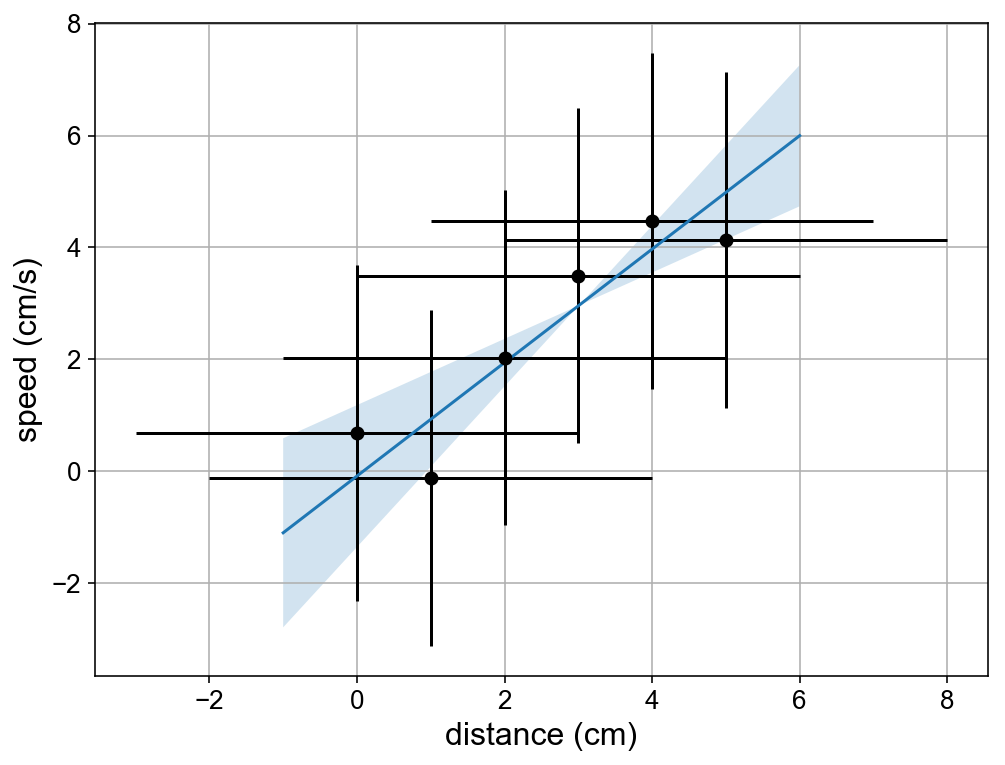

In [200]:
# Create a model for fitting.
my_model = Model(MODEL)

# Create a RealData object using our initiated data from above.
data = RealData(X, Y, sx=X_ERR, sy=Y_ERR)

# Set up ODR with the model and data.
odr = ODR(data, my_model, beta0=[0., 1.])

# Run the regression.
out = odr.run()

# Calculating R value 
SSE = np.sum((Y - MODEL(out.beta, X))**2)
SSTO = np.sum((Y - np.mean(Y))**2)
R2 = 1. - SSE / SSTO

# Use the in-built pprint method to give us results.
# out.pprint()
info = {'m': '{0: .3f} +/- {1:.3f}'.format(out.beta[0], 2*out.sd_beta[0]), 
        'b': '{0: .3f} +/- {1:.3f}'.format(out.beta[1], 2*out.sd_beta[1]),
        'R2': '{0: .3f}'.format(R2)}
print('slope:\t{m}\ny-int:\t{b}\nR^2:\t{R2}'.format(**info))

# Setup the plot
fig, ax = plt.subplots(figsize=(8,6))
ax.grid()
ax.tick_params(labelsize = 13)
ax.set_xlabel(X_LABEL, fontsize = 16)
ax.set_ylabel(Y_LABEL, fontsize = 16)

# Plot the data
ax.errorbar(X, Y, xerr=X_ERR, yerr=Y_ERR, linestyle='None', marker='o', color='k')

# Plot the linear fit and 95% confidence interval
x_range = X[-1] - X[0]
x_fit = np.linspace(X[0] - 0.2*x_range, X[-1] + 0.2*x_range, 1000)
y_fit = MODEL(out.beta, x_fit)
y_max = MODEL(out.beta + 2*np.array([out.sd_beta[0], -out.sd_beta[1]]), x_fit)
y_min = MODEL(out.beta - 2*np.array([out.sd_beta[0], -out.sd_beta[1]]), x_fit)
ax.plot(x_fit, y_fit)
ax.fill_between(x_fit, y_min, y_max, alpha=.2)

plt.show()

In [184]:
SSE / len(X)

0.4966926516008406

In [186]:
out.sum_square

0.16324150807991966

In [172]:
Y - MODEL(out.beta, X)

array([ 0.13325232, -0.23172226,  0.0420492 , -0.00834935,  0.22655146,
       -0.16178101])